<a href="https://colab.research.google.com/github/mdumarr-ui/CVIP/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis- Terrorism**

problem statement:- The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset
to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover
trends, identify high-risk regions, understand attack characteristics, and potentially reveal
factors that contribute to terrorist activities.

# **Importing libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Reading dataset from kaggle**

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle datasets download -d itssuru/global-terrorism

 60% 17.0M/28.2M [00:00<00:00, 59.5MB/s]
100% 28.2M/28.2M [00:00<00:00, 82.8MB/s]


In [6]:
!unzip \*.zip && rm *.zip

Archive:  global-terrorism.zip
  inflating: globalterrorism.csv     


In [7]:
globalterrorism_df = pd.read_csv('/content/globalterrorism.csv', encoding='latin')

In [8]:
globalterrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
globalterrorism_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


# **To view the shape of dataset**

In [10]:
print("There are{} rows and {} columns in the dataset".format(globalterrorism_df.shape[0],globalterrorism_df.shape[1]))

There are181691 rows and 135 columns in the dataset


In [11]:
globalterrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# **Checking the uniquness of the columns of the datasets**

In [12]:
No_of_cols=globalterrorism_df.columns.nunique()
print("There are total %d columns in the data" %No_of_cols)

There are total 135 columns in the data


# **Renaming the columns to use for analysis**

In [13]:
globalterrorism_df=globalterrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [14]:
globalterrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# **Selecting only those columns which are actually required**

In [15]:
globalterrorism_df=globalterrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype',	'Gang_name', 'Weapon_type']]

In [16]:
globalterrorism_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


# **checking the updtate shape of data**

In [17]:
globalterrorism_df.shape

(181691, 12)

# **Checking for the null values**

In [18]:
globalterrorism_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
dtype: int64

# **Filling the NaN values**

In [19]:
globalterrorism_df['Target_subtype'] = globalterrorism_df['Target_subtype'].fillna('others')

In [20]:
globalterrorism_df['State']=globalterrorism_df['State'].fillna('Unknown')

In [21]:
globalterrorism_df['City']=globalterrorism_df['City'].fillna('Unknown')

In [23]:
globalterrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [24]:
globalterrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [25]:
globalterrorism_df.shape

(181691, 12)

In [26]:
globalterrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [27]:
globalterrorism_df.head(20)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [28]:
globalterrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [30]:
globalterrorism_df.columns.nunique()

12

In [31]:
Total_countries=globalterrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


In [32]:
print(globalterrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [33]:
print(globalterrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [34]:
print(globalterrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [35]:
print(globalterrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [36]:
print(globalterrorism_df['Gang_name'].nunique())

3537


In [37]:
print(globalterrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [38]:
globalterrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181691 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [39]:
globalterrorism_df.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505650
std,13.259430,3.388303,8.814043
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Month'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Day'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Month'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Day'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['Year', 'Month'], ['Month', 'Day']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Year', 'Month', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Year', 'Day', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Year', 'count()', None], **{})
chart

In [40]:
globalterrorism_df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [41]:
globalterrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [42]:
globalterrorism_df['State'].value_counts().head(10)

Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

In [43]:
globalterrorism_df['Target_subtype'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: Target_subtype, dtype: int64

In [44]:
globalterrorism_df['City'].value_counts().head(10)

Unknown         10209
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: City, dtype: int64

In [45]:
globalterrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [46]:
globalterrorism_df['Target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

In [47]:
globalterrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

In [48]:
globalterrorism_df['Weapon_type'].value_counts().head(10)

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Name: Weapon_type, dtype: int64

# **Visualizing the dataset**

# **Attack by weapons**

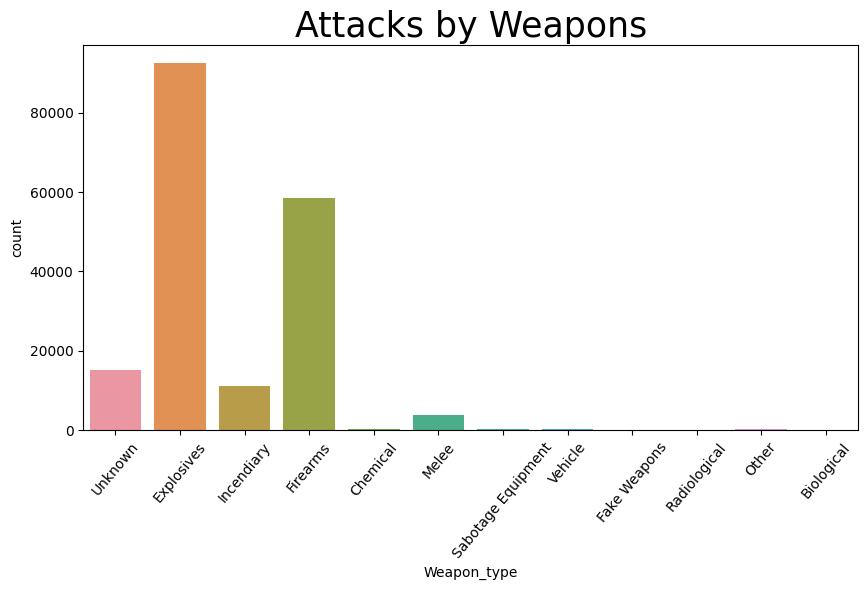

In [50]:
plt.figure(figsize=(10,5));
plt.xticks(rotation = 50)
plt.title('Attacks by Weapons', fontsize = 25)
sns.countplot(x=globalterrorism_df.Weapon_type);

# **Attacks by year**

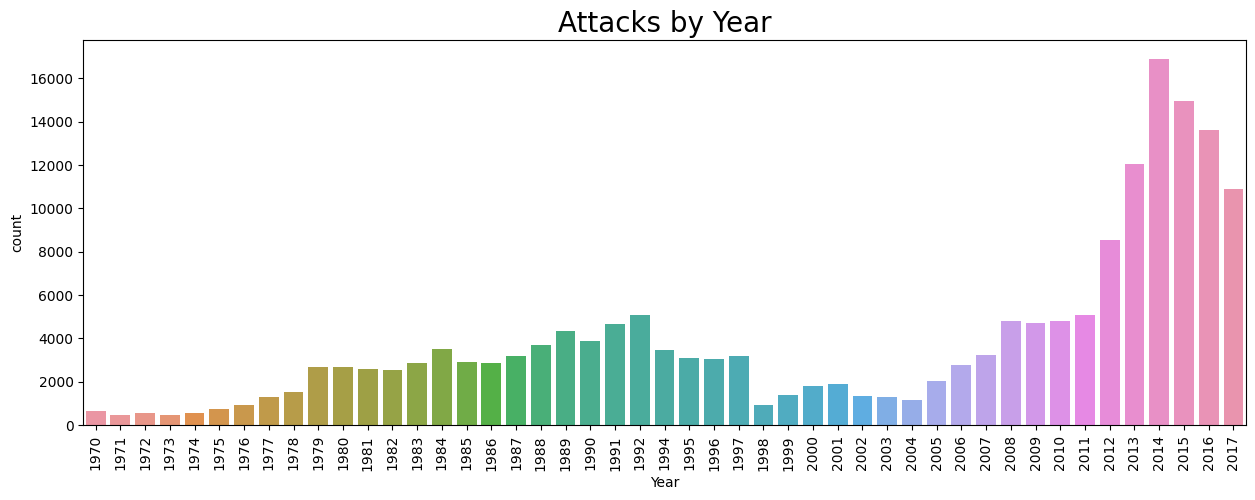

In [51]:
plt.figure(figsize=(15,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year', fontsize = 20)
sns.countplot(x=globalterrorism_df.Year);

# **Attacks by month**

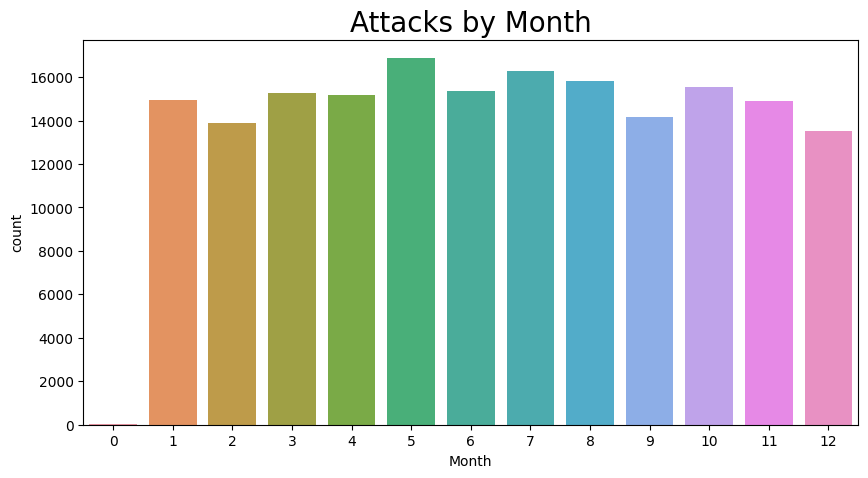

In [52]:
plt.figure(figsize=(10,5));
plt.title('Attacks by Month', fontsize = 20)
sns.countplot(x=globalterrorism_df.Month);

# **Attacks by day**

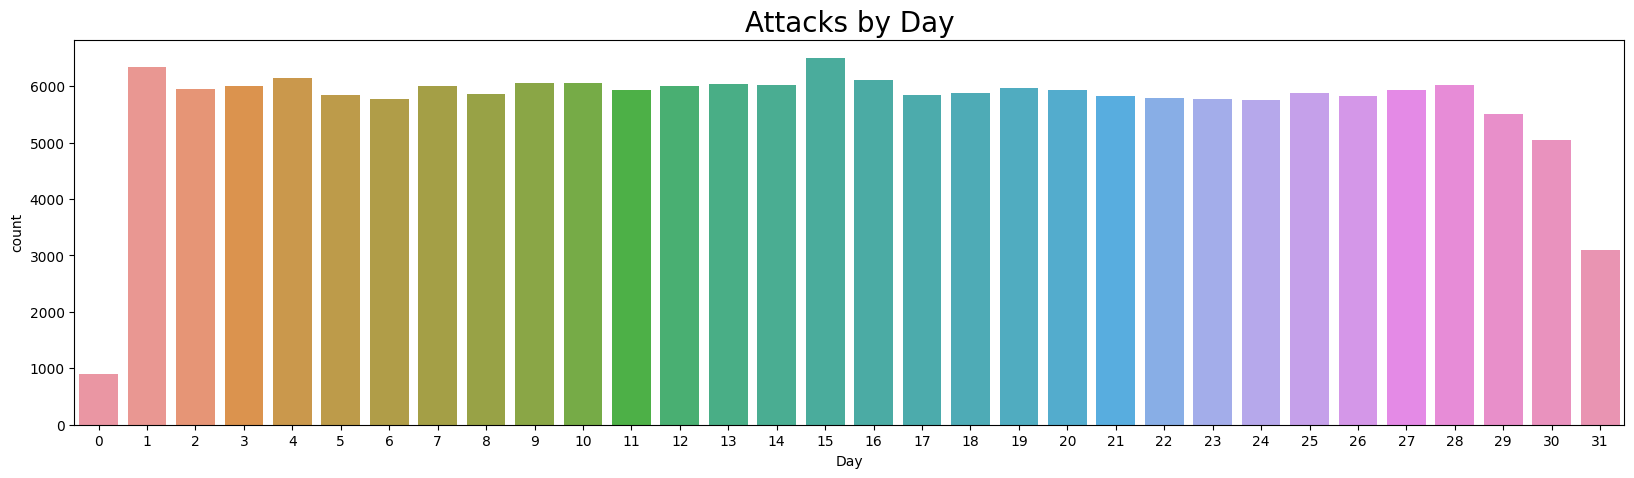

In [53]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize = 20)
sns.countplot(x=globalterrorism_df.Day);

# **Attacks by high risk region**

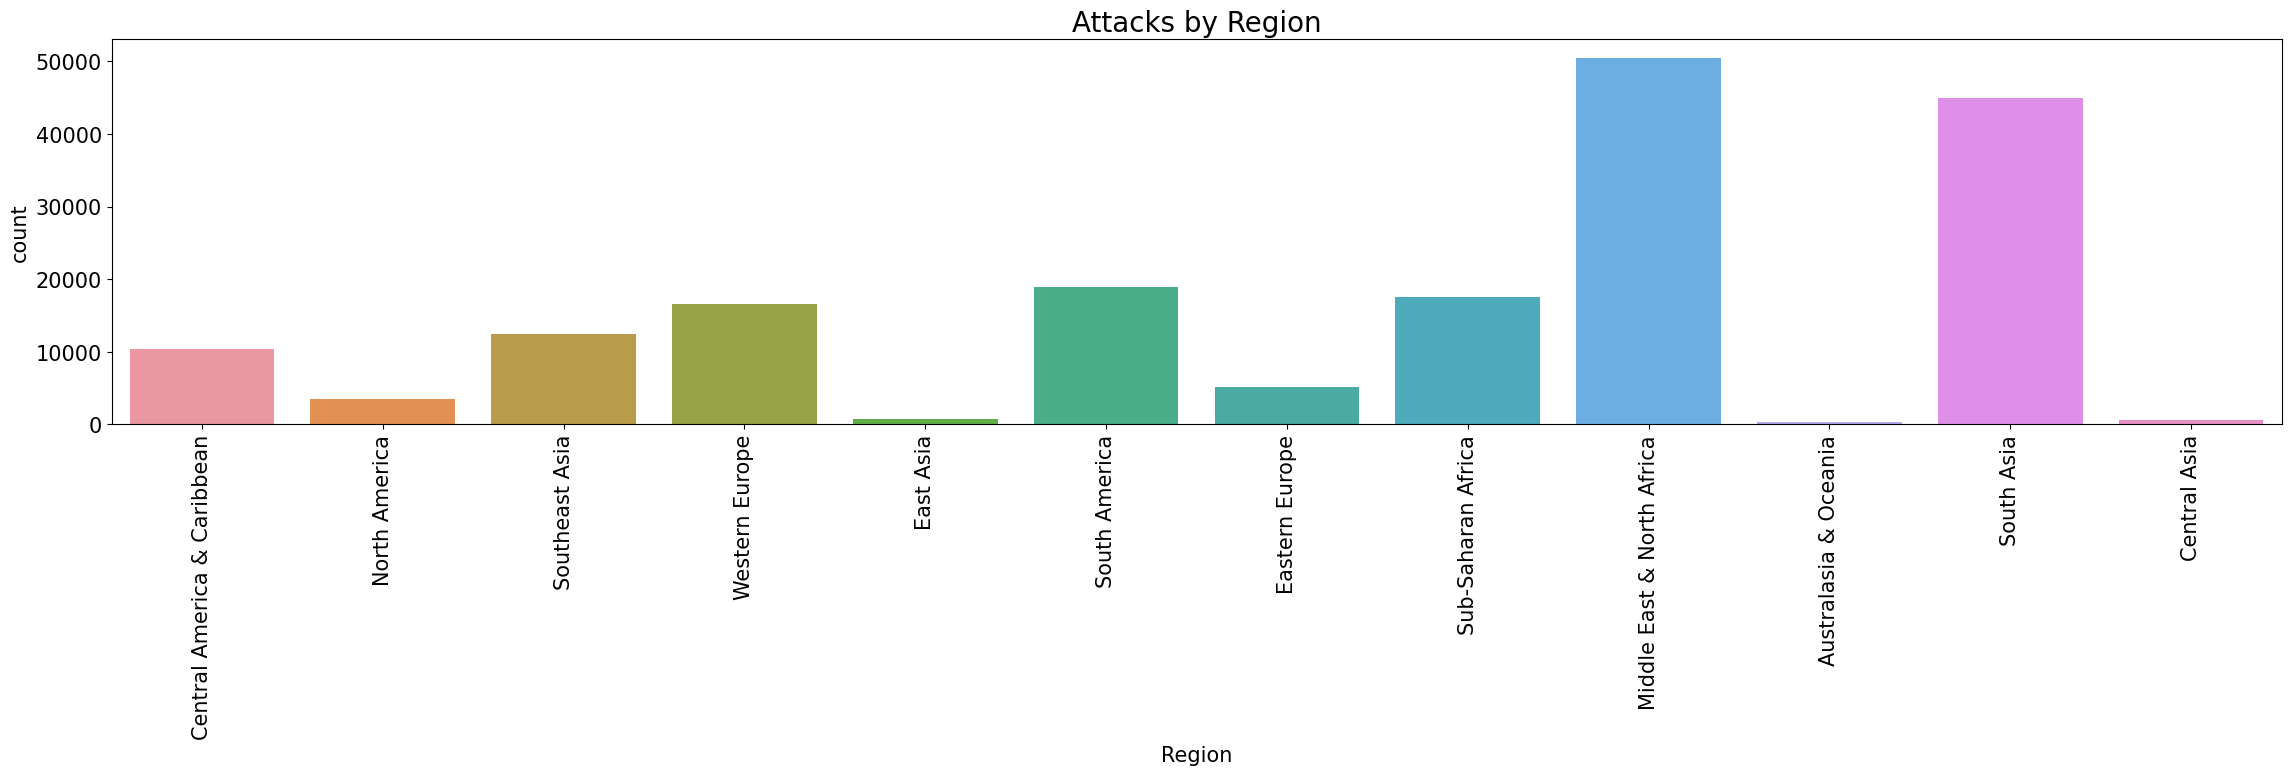

In [57]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Attacks by Region', fontsize =20)
sns.countplot(x=globalterrorism_df.Region);

# **Attack based on target type**

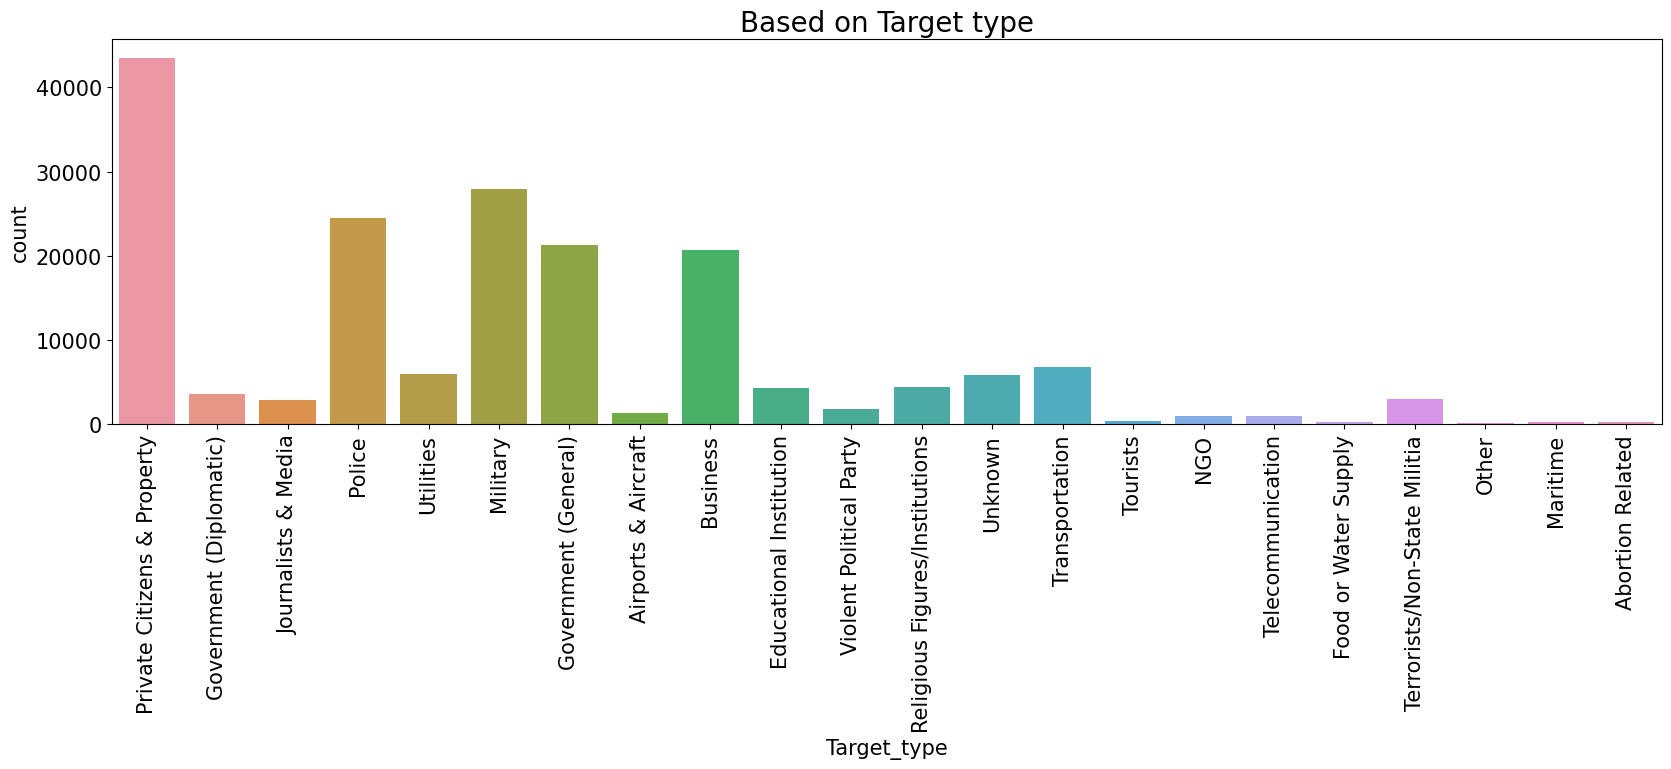

In [58]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Target type', fontsize =20)
sns.countplot(x=globalterrorism_df.Target_type);

# **Attacks based on attack type**

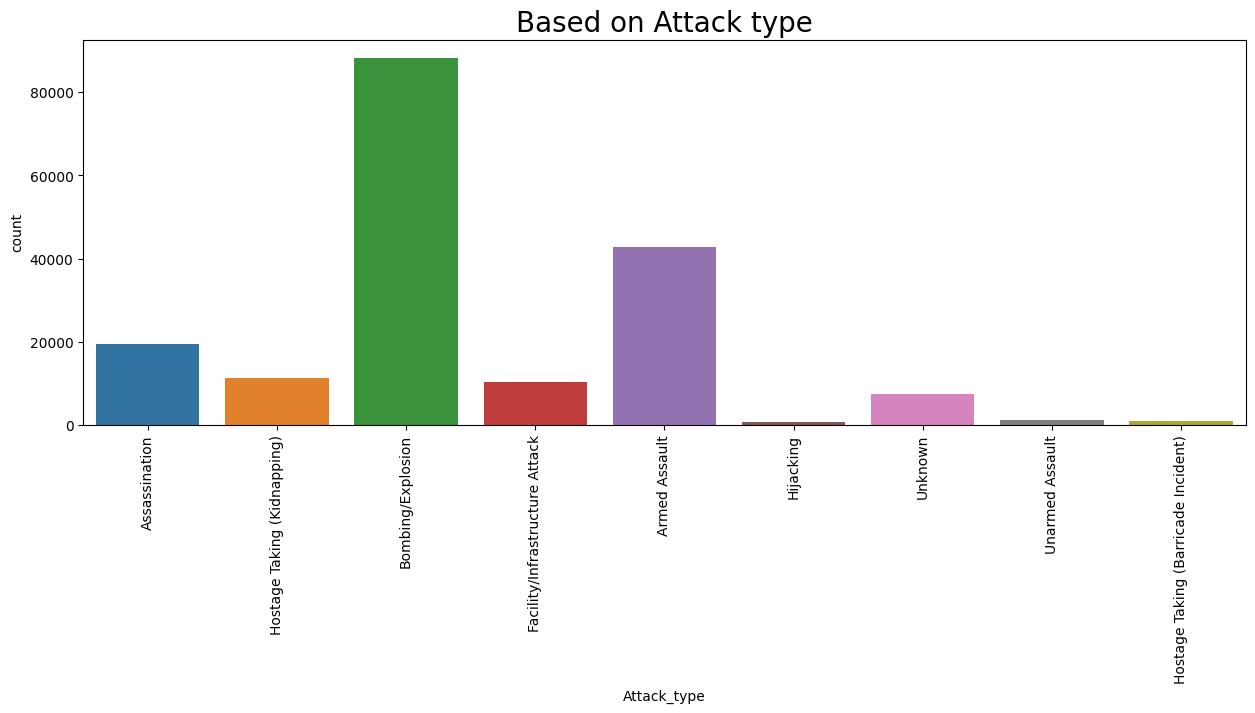

In [60]:
plt.figure(figsize=(15,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Attack type', fontsize = 20)
sns.countplot(x=globalterrorism_df.Attack_type);

# **Result of Analysis**

After observing different graphs, we obtained the following results:

Explosive : Most used weapon type in attacks

2014 : Most number of attacks year

5th month(May) : Most number of attacks month

15th day of month : Most number of attacks day

Iraq : Most attacked country

Baghdad : Most attacked State

Middle East and North America : Most attacked region

Private Citizens and Property : Most attack based on target type

Bombing /Explosion : Most attack based on attack type

# **Factor that contribute to terrorist activities are:-**

Terrorism is a complex phenomenon with many dimensions that vary in intensity and nature across time periods and have both long and short term causes. While it’s difficult to pinpoint specific factors that lead to terrorism, researchers have identified several contributing elements:

**Political Factors**,
**IdeologicalReligious Factors**,
**Globalization and Technology**,
**Psychological Factors** ETC.


# **Security issues and insight from the EDA**

From above result of analysis it is clear that explosive is the most used weapon type in the attacks. And keeping track of other result. Following measures can be adopted to reduce the number of attacks and terrorism.

The government should firmly tighten border security

Strict immigration laws and regulations should be put in place.

It is important to restrict access to lethal weapons.

States should ensure their internal security.